In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [65]:
url = 'https://raw.githubusercontent.com/miguelgunawan/dataset-w2-Data-Mining/refs/heads/main/adult.dataset.csv'#memberikan link dataset dari kaggle yang telah diupload di github
df = pd.read_csv(url) #membuat variabel untuk menyimpan dataset
df.head()#menampilkan 5 data teratas dari dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [35]:
df.isnull().sum()#pengecekan data null

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [36]:
print(df.info())#menampilkan informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [37]:
df.describe()#menampilkan deskripsi kolom dari dataset

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


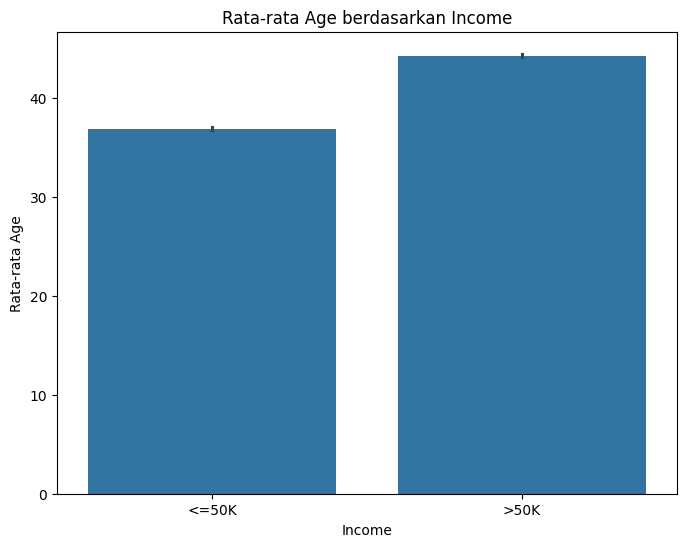

In [66]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='income', y='age', estimator='mean')
plt.title('Rata-rata Usia berdasarkan Income')
plt.xlabel('Income')
plt.ylabel('Rata-rata Usia')
plt.show()
# bar chart yang dapat membandingkan rata-rata usia berdasarkan jumlah income nya
# dari chart ini dapat kita lihat bahwa usia atau rata-rata age yang lebih tinggi memiliki income yang tinggi juga

<ipython-input-72-0d4995b3e529>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='education', y='income', palette='Set2')


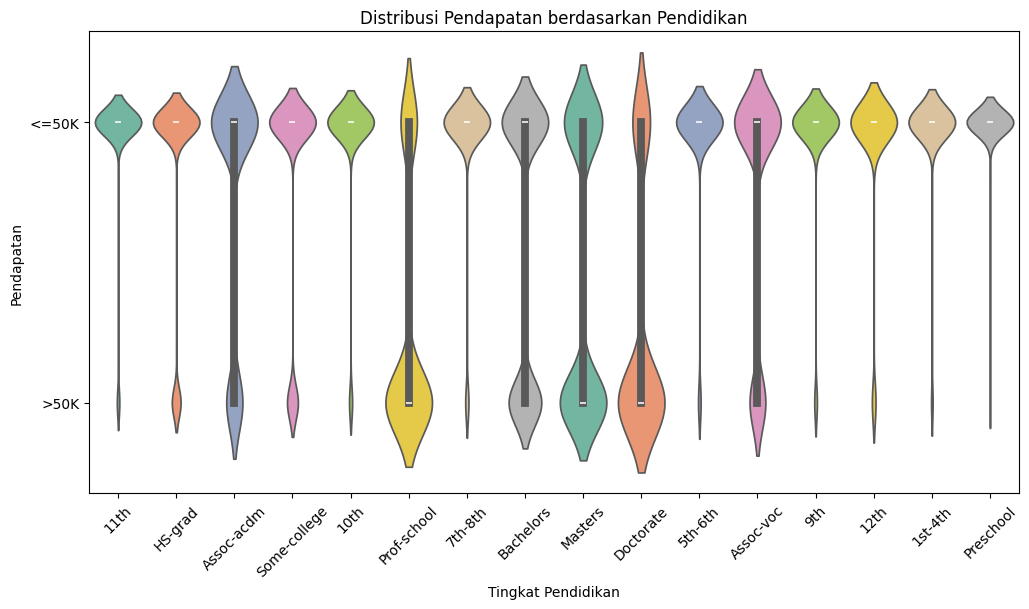

In [72]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='education', y='income', palette='Set2')
plt.title('Distribusi Pendapatan berdasarkan Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Pendapatan')
plt.xticks(rotation=45)
plt.show()
# kelompok dengan pendidikan tinggi (seperti gelar sarjana) cenderung memiliki rentang pendapatan yang lebih luas, dengan beberapa individu menghasilkan lebih dari $50K.
# kelompok pendidikan, seperti HS-grad dan Some-college, menunjukkan bahwa sebagian besar individu berada di kategori pendapatan <=50K
# Kelompok dengan pendidikan lebih tinggi, seperti Assoc-acdm dan Bachelors, menunjukkan konsentrasi yang lebih besar pada pendapatan >50K
# violin plot ini mengilustrasikan pentingnya pendidikan dalam menentukan pendapatan, dengan pendidikan yang lebih tinggi cenderung menghasilkan pendapatan yang lebih baik.

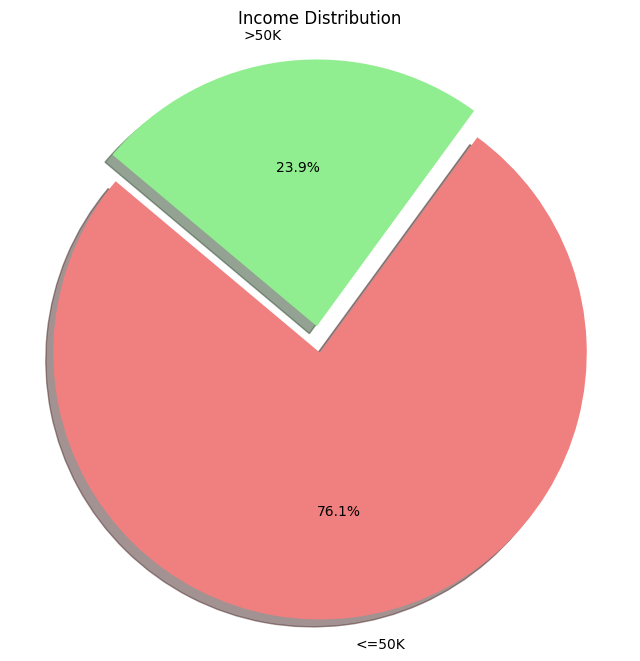

In [75]:
# Count income categories
income_counts = df['income'].value_counts()

# Prepare data untuk pie chart
labels = income_counts.index
sizes = income_counts.values
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)  # explode the first slice for emphasis

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Income Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()
# pie chart ini membagi seluruh orang dari dataset dengan pendapatan <50k dan >50k

In [38]:

# untuk mengubah kolom kategorikal (workclass, education, dll) menjadi numerik
label_encoder = LabelEncoder()

# untuk identifikasi dan memilih semua kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

# untuk mengonversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# untuk menampilkan 10 data random
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
24379,18,0,215463,2,8,4,0,3,4,0,0,0,25,39,0
11630,28,4,175537,15,10,5,1,4,2,0,0,0,37,39,0
12586,18,4,200290,11,9,4,12,3,4,1,0,0,35,39,0
41445,20,4,47541,15,10,4,12,3,4,1,0,0,30,39,0
34855,24,4,410439,15,10,4,3,3,4,1,0,0,15,39,0
38035,49,5,191277,15,10,2,4,0,4,1,15024,0,50,39,1
19483,23,4,128604,11,9,4,12,3,1,1,0,0,48,35,0
18645,22,4,181773,11,9,4,14,3,2,1,0,0,40,39,0
34660,29,4,173851,11,9,2,3,0,4,1,0,0,40,39,0
16905,47,4,241832,6,5,3,6,4,4,1,0,0,40,8,0


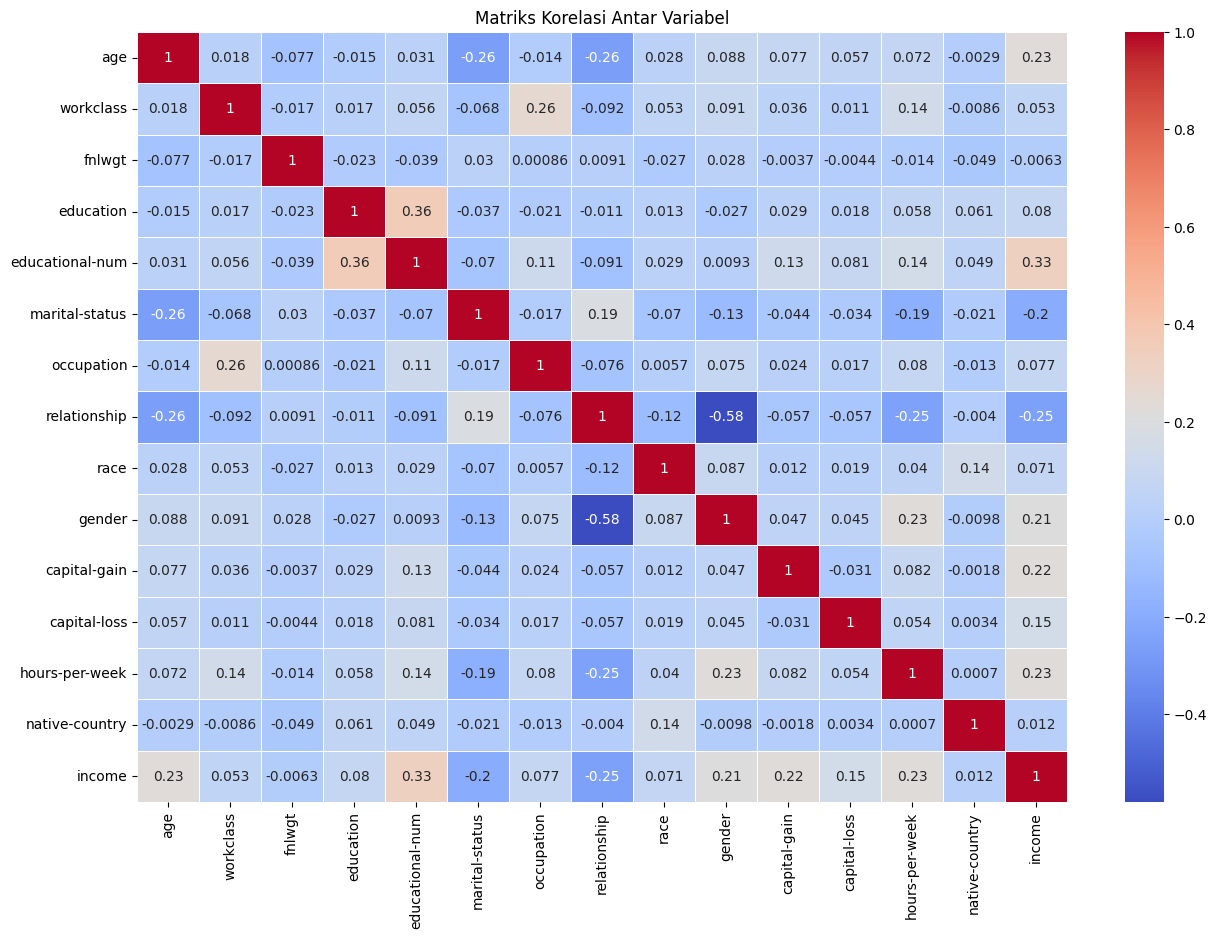

In [39]:
# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

# Membuat Heatmap untuk melihat korelasi antar-fitur
# Variabel yang paling berhubungan dengan pendapatan adalah tingkat pendidikan (dengan korelasi 0,33),
# menunjukkan bahwa pendidikan yang lebih tinggi berpengaruh positif pada pendapatan. Selain itu, usia (0,24), jam kerja per minggu (0,23),
# keuntungan modal (0,22), dan jenis kelamin (0,22) juga memiliki hubungan positif yang cukup kuat dengan pendapatan, meski tidak sekuat pendidikan.
# Sebaliknya, hubungan keluarga (-0,25) dan status pernikahan (-0,19) memiliki hubungan negatif dengan pendapatan.

In [40]:
X = df.drop(['income'], axis=1)
y = df['income']
#membuat variabel untuk menampung kolom dari dataset
#kolom x untuk semua kolom dataset kecuali outcome
#kolom y untuk kolom outcome

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#Digunakan untuk mengsplit data dengan ukuran 20 persen untuk test dan 80 untuk train

In [42]:
X_train.shape, X_test.shape
#menunjukkan jumlah kolom dan baris

((39073, 14), (9769, 14))

In [43]:
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt_en.fit(X_train, y_train)
#membuat pelatihan pemodelan untuk decision tree yang menggunakan kriteria entropi

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [44]:
y_pred_en = dt_en.predict(X_test)
#memprediksi x_test menggunakan kriteria entropi

In [45]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
#melihat keakurasian dari pemodelan dengan kriteria entropi

Model accuracy score with criterion entropy: 0.8449


In [46]:
y_train_pred = dt_en.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = dt_en.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")
#melihat hasil balance pemodelan dan menapilkan akurasi test dan training

Training accuracy: 0.8384
Test accuracy: 0.8449
The model might be underfitting.


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 0.992\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\nentropy = 0.918\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'entropy = 0.882\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'entropy = 0.124\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\nentropy = 0.854\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'entropy = 0.914\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'entropy = 0.027\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\nentropy = 0.463\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\nentropy = 0.398\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 20994\nvalue = [1994

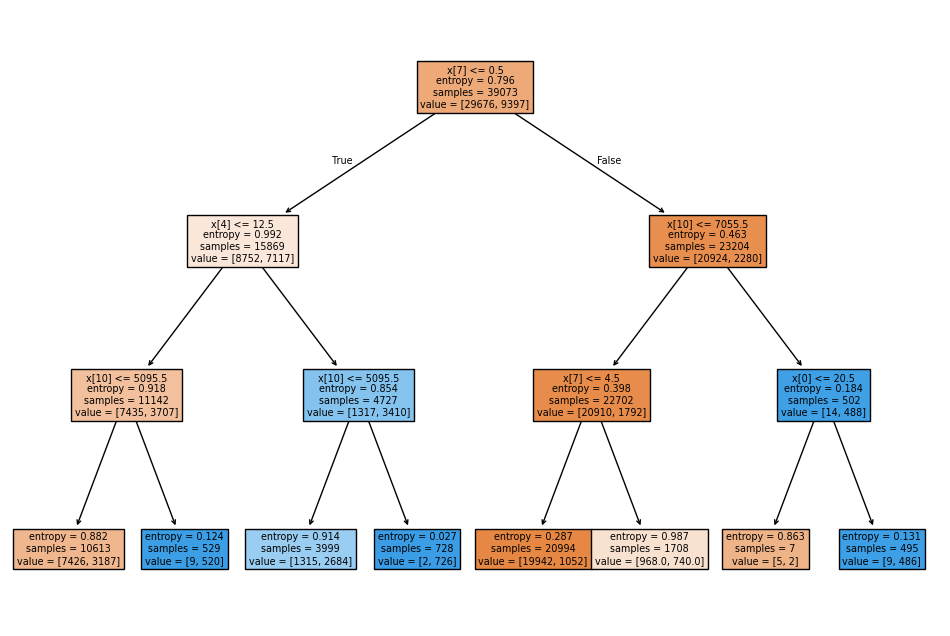

In [47]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_en.fit(X_train, y_train), filled=True)
#membuat decision tree dengan kriteria entropi dengan library matplotlib

In [48]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

dt_gini.fit(X_train, y_train)
#membuat pelatihan pemodelan untuk decision tree yang menggunakan kriteria gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [49]:
y_pred_gini = dt_gini.predict(X_test)
#memprediksi x_test menggunakan kriteria gini

In [50]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
#melihat keakurasian dari pemodelan dengan kriteria gini

Model accuracy score with criterion gini: 0.8449


In [51]:
y_train_pred = dt_gini.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = dt_gini.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")
#melihat hasil balance pemodelan dan menapilkan akurasi test dan training

Training accuracy: 0.8384
Test accuracy: 0.8449
The model might be underfitting.


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\ngini = 0.177\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\ngini = 0.145\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, '

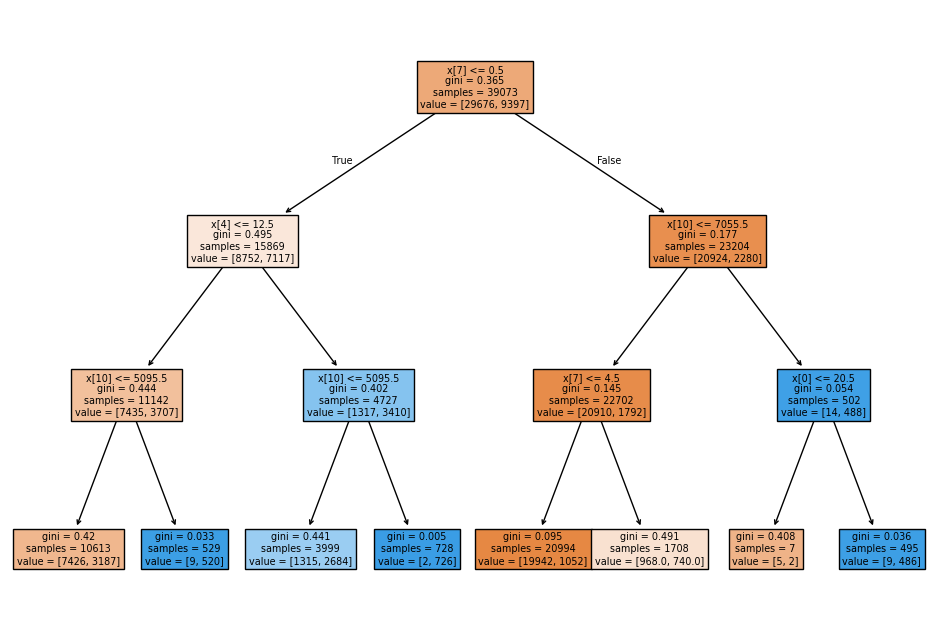

In [52]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_gini.fit(X_train, y_train), filled=True)
#membuat decision tree dengan kriteria gini dengan library matplotlib

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)
print("Confusion Matrix for Entropy-based Tree:\n", cm)

cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix for Gini-based Tree:\n", cm)

print(classification_report(y_test, y_pred_en))
print(classification_report(y_test, y_pred_gini))
#confusion matrix berdasarkan decision tree kriteria entropi dan gini

Confusion Matrix for Entropy-based Tree:
 [[7136  343]
 [1172 1118]]
Confusion Matrix for Gini-based Tree:
 [[7136  343]
 [1172 1118]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



In [54]:
# Model lebih efektif dengan f1-score mencapai 0.90
# Akurasi keseluruhan dengan metode Entropy dan gini adalah 0.84 sama- sama akurat

In [55]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
# Modelling denga menggunakan Gaussian Bayes Classifier.

GaussianNB()

In [56]:
nb_y_pred = nb_classifier.predict(X_test)
#memprediksi x_test menggunakan kriteria gaussian

In [57]:
cm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix for Naive Bayes:\n", cm)
#confusion matrix berdasarkan naive bayes

Confusion Matrix for Naive Bayes:
 [[7099  380]
 [1580  710]]


In [58]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))
# print score keakurasiannya

Accuracy Score: 0.7994


In [59]:
print(classification_report(y_test, nb_y_pred))
#print laporan report dari akurasi, precision, recall, f1-score, dsb

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



Dari laporan ini, dapat disimpulkan bahwa skor akurasi adalah 0,80 atau 80%. Skor presisi, recall, dan f1 juga lebih tinggi dibandingkan dengan skor akurasi.

In [60]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan dengan menggunakan logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [61]:
y_pred_log = classifier.predict(X_test)
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
print(comparison_table.head())
#membuat pelatihan untuk memprediksi data x_test dan membuat komparasi untuk menunjukkan tabel aktual dan tabel prediksi

       y_test  y_pred
7762        0       0
23881       0       0
30507       1       1
28911       0       0
19484       0       0


In [62]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))
# print score keakurasiannya

Accuracy Score: 0.8061


In [63]:
cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)
#confusion matrix

Confusion Matrix:
 [[7034  445]
 [1449  841]]


In [64]:
print(classification_report(y_test, y_pred_log))
#print laporan report dari akurasi, precision, recall, f1-score, dsb

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7479
           1       0.65      0.37      0.47      2290

    accuracy                           0.81      9769
   macro avg       0.74      0.65      0.68      9769
weighted avg       0.79      0.81      0.79      9769



Model regresi logistik memiliki akurasi keseluruhan sebesar 0,81. Model ini menunjukkan kinerja yang lebih baik untuk kelas 0, dengan presisi 0,83, recall 0,94, dan F1-score 0,88. Sementara itu, kelas 1 memiliki presisi yang lebih rendah di angka 0,83, recall juga di bawah 0,94, dan F1-score 0,88.